In [58]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS ##biblioteka, która pozwala na wprowadzenie map najczęstszych słów, więcej na dole

In [57]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pwd = os.getcwd()

In [6]:
df = pd.read_csv(pwd + '/movies.csv')

In [7]:
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [8]:
df.isna().sum()

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            99 non-null     float64
 1   movie_name       99 non-null     object 
 2   year_of_release  99 non-null     object 
 3   category         99 non-null     object 
 4   run_time         99 non-null     object 
 5   genre            99 non-null     object 
 6   imdb_rating      99 non-null     float64
 7   votes            99 non-null     object 
 8   gross_total      98 non-null     object 
dtypes: float64(2), object(7)
memory usage: 7.1+ KB


In [10]:
df.describe()

,index,imdb_rating
count,99.000000,99.000000
mean,50.000000,8.348485
std,28.722813,0.368772
min,1.000000,7.200000
25%,25.500000,8.100000
50%,50.000000,8.300000
75%,74.500000,8.600000
max,99.000000,9.300000


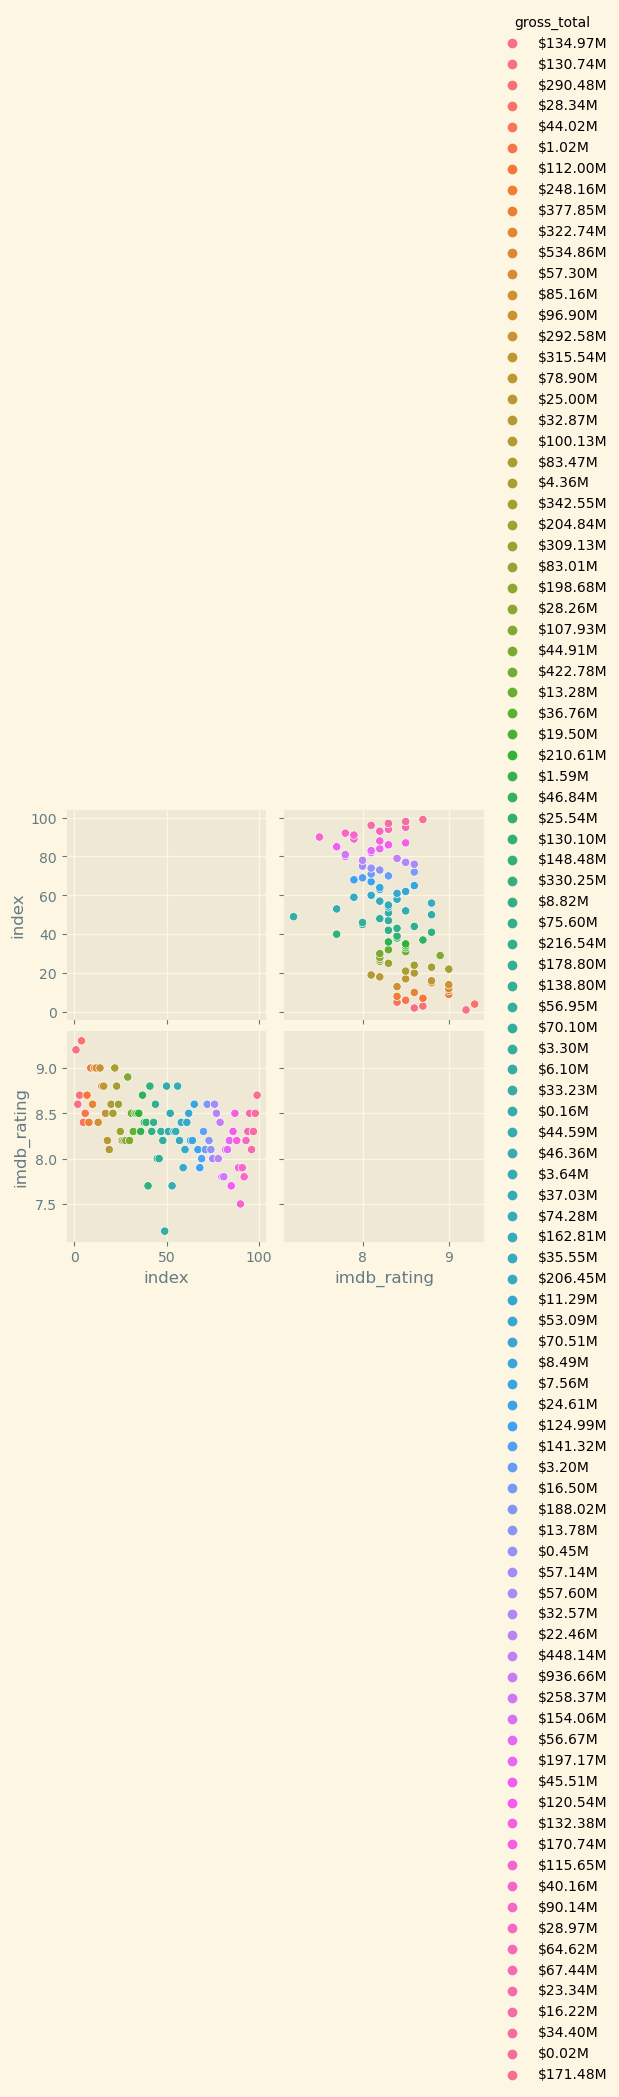

In [11]:
sns.pairplot(df, hue = 'gross_total')

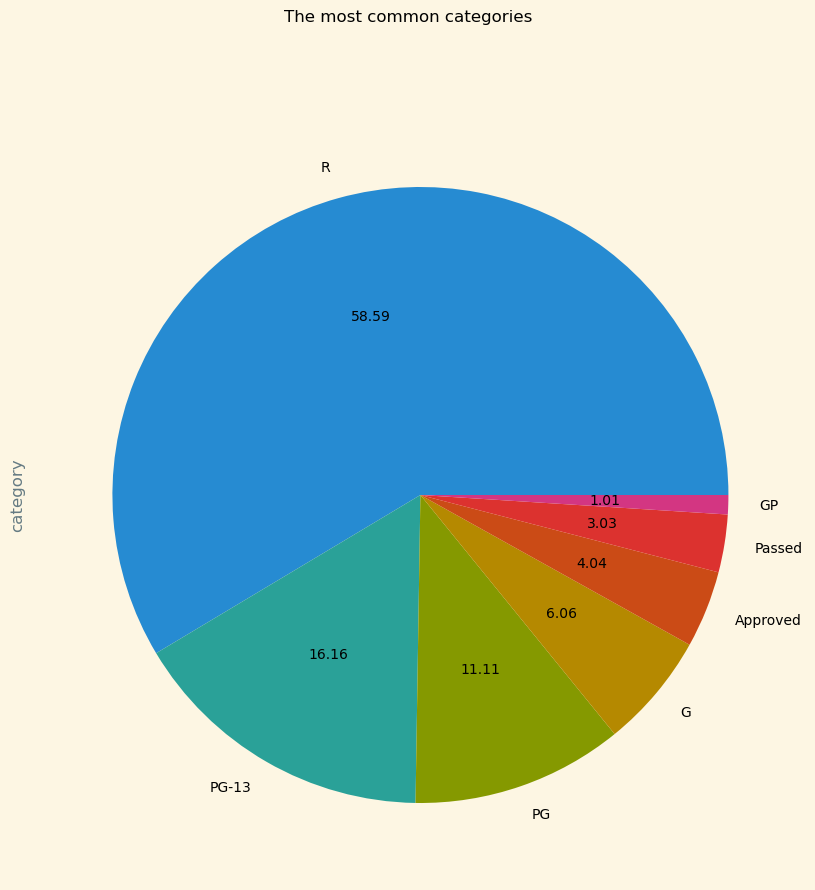

In [22]:
df['category'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), 
                                   title='The most common categories')
plt.show()

In [13]:
df['gross_total'] = df['gross_total'].astype(str).str.lstrip('$').str.rstrip('M')

In [14]:
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",134.97
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",130.74
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",290.48
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",28.34
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",44.02


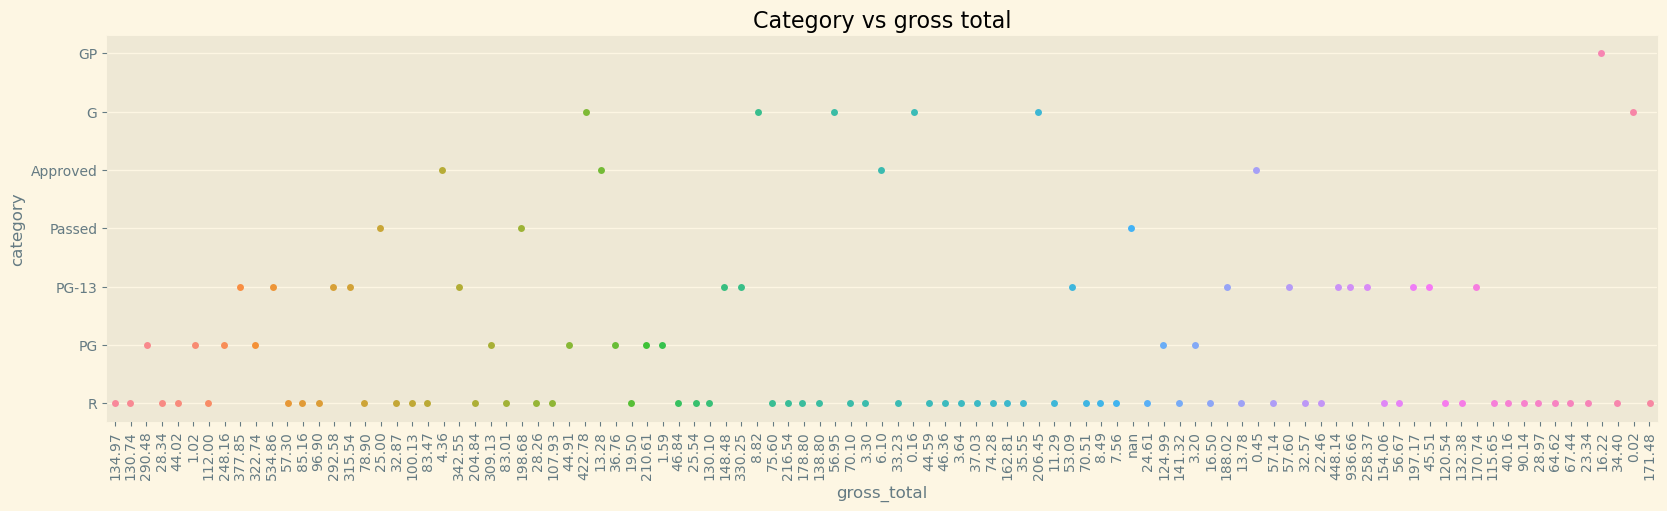

In [20]:
fig, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation = 90)
ax = sns.stripplot(y = 'category', x = 'gross_total', data = df).set(title = 'Сategory vs gross total')
plt.show(ax)

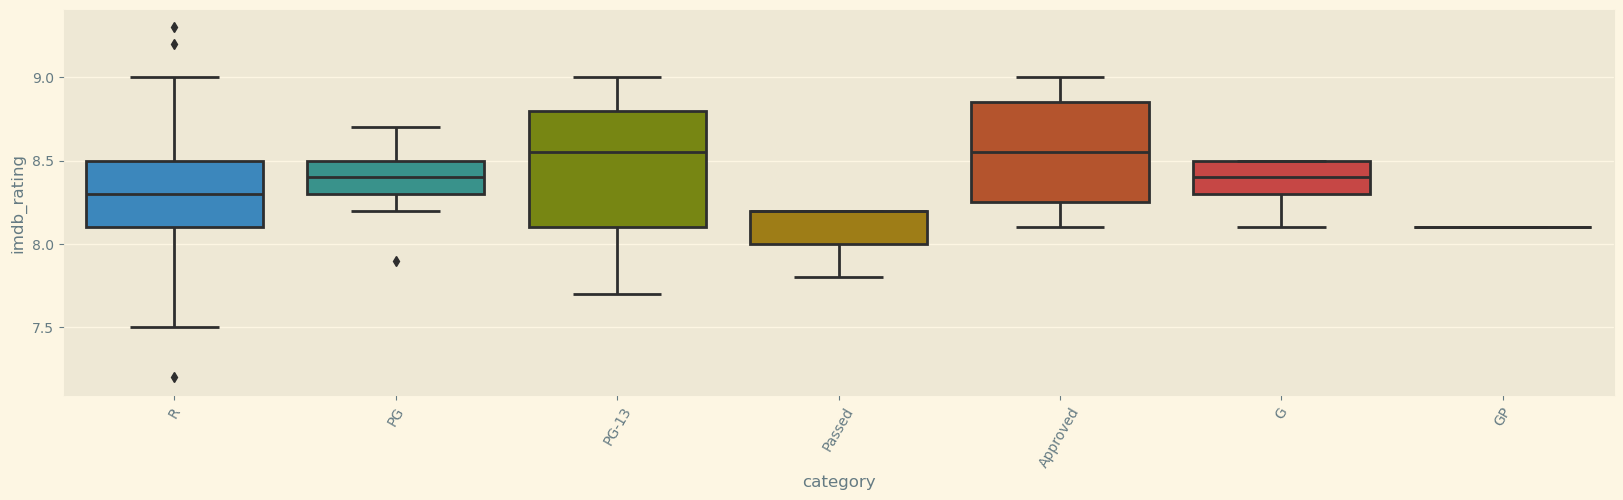

In [21]:
fig, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation = 60)
ax = sns.boxplot(x = 'category', y = 'imdb_rating', data = df)
plt.show(ax)

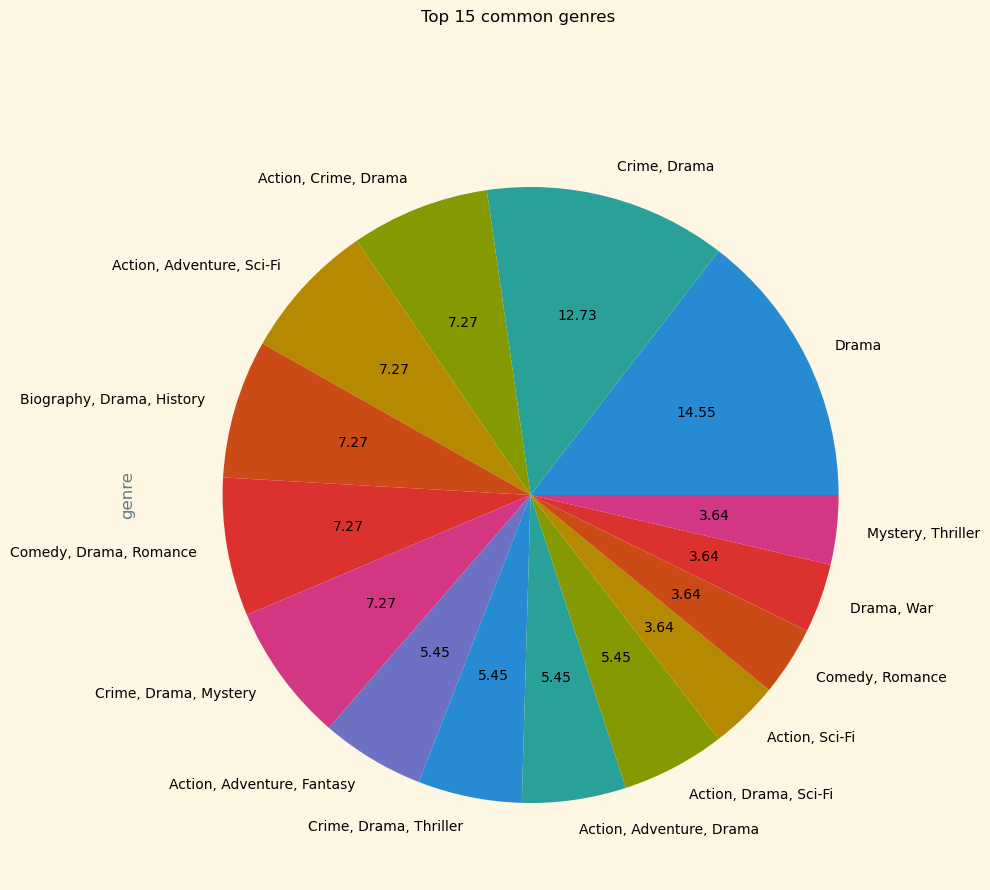

In [23]:
df['genre'].value_counts().head(15).plot(kind = 'pie', subplots = True, autopct='%1.2f', figsize=(10,10),
                               title = 'Top 15 common genres')
plt.show()

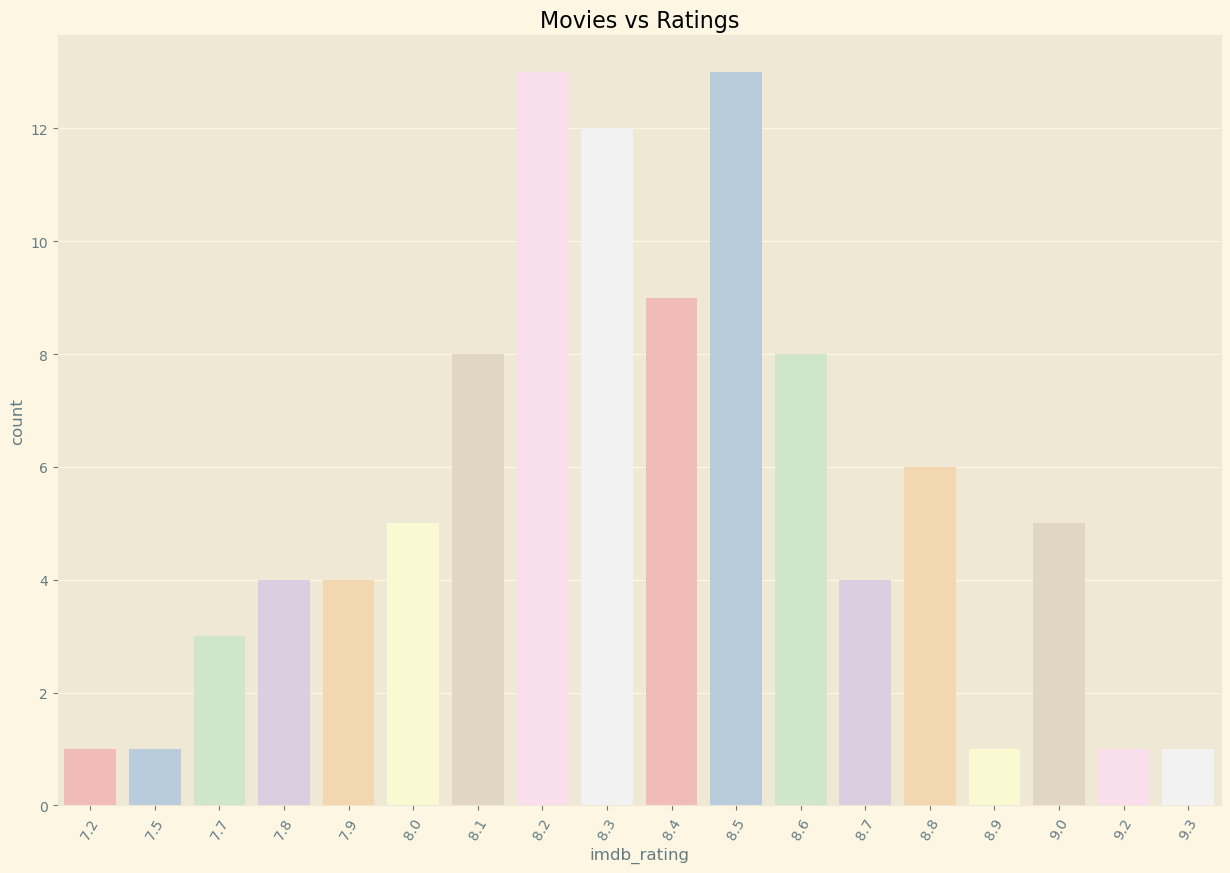

In [27]:
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 60)
sns.countplot(data = df, x = 'imdb_rating', palette = 'Pastel1').set(title = 'Movies vs Ratings')
plt.show()

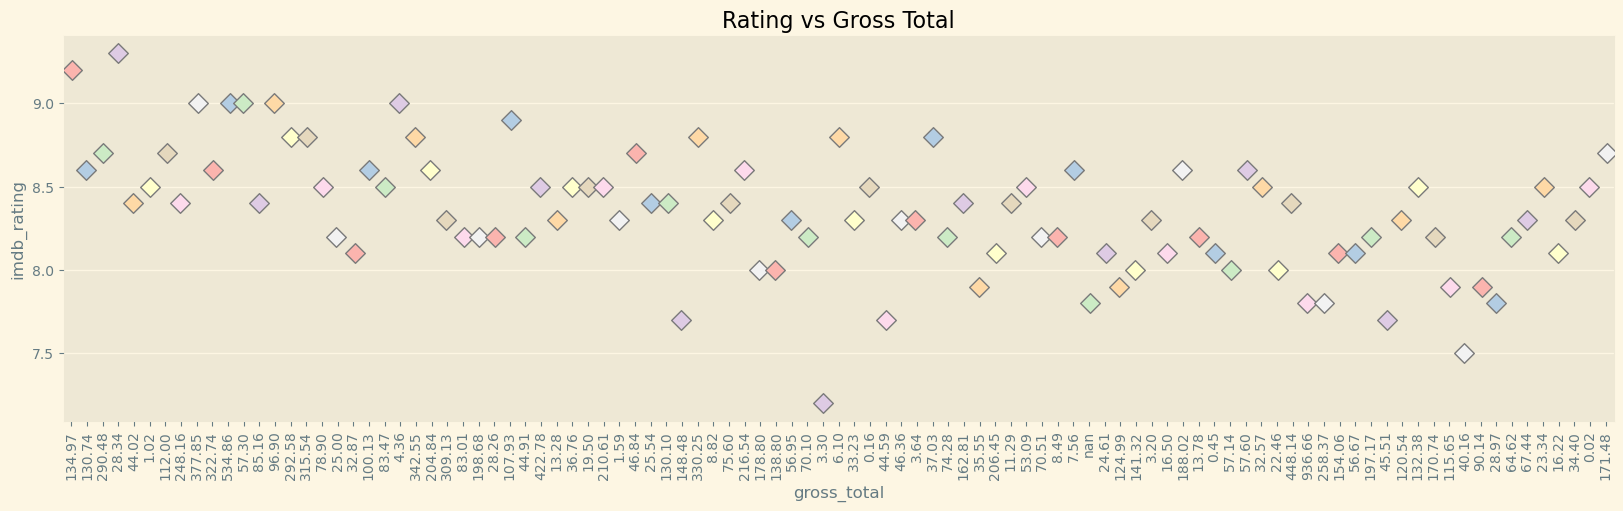

In [36]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
sns.stripplot(data = df, y = 'imdb_rating', x = 'gross_total', palette = 'Pastel1', s = 10, marker = 'D',
             linewidth = 1, alpha = 1).set(title = 'Rating vs Gross Total')
plt.show()

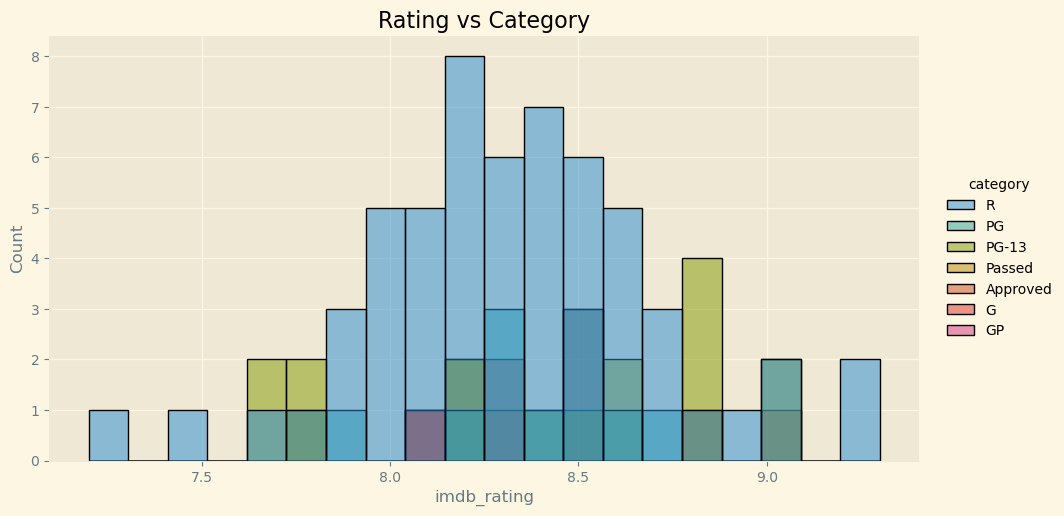

In [40]:
sns.displot(df, x = 'imdb_rating', bins = 20, hue = 'category', aspect = 1.9).set(title = 'Rating vs Category')
plt.show()


In [41]:
df['year_of_release'] = df['year_of_release'].str.replace('\(|\)','')

In [42]:
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,1972,R,175 min,"Crime, Drama",9.2,"1,860,471",134.97
1,2.0,The Silence of the Lambs,1991,R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",130.74
2,3.0,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",290.48
3,4.0,The Shawshank Redemption,1994,R,142 min,Drama,9.3,"2,683,302",28.34
4,5.0,The Shining,1980,R,146 min,"Drama, Horror",8.4,"1,025,560",44.02


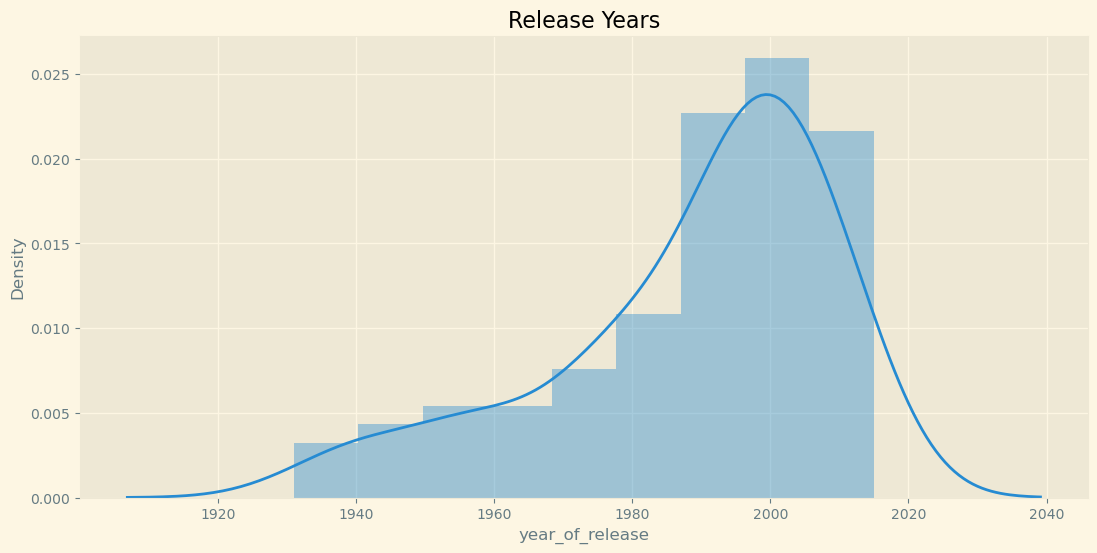

In [44]:
plt.figure(figsize=(13,6))
sns.distplot(df["year_of_release"])
plt.title("Release Years")
plt.show()

In [45]:
df['run_time'] = df['run_time'].apply(lambda x:float(x.split()[0].replace('min', '')))

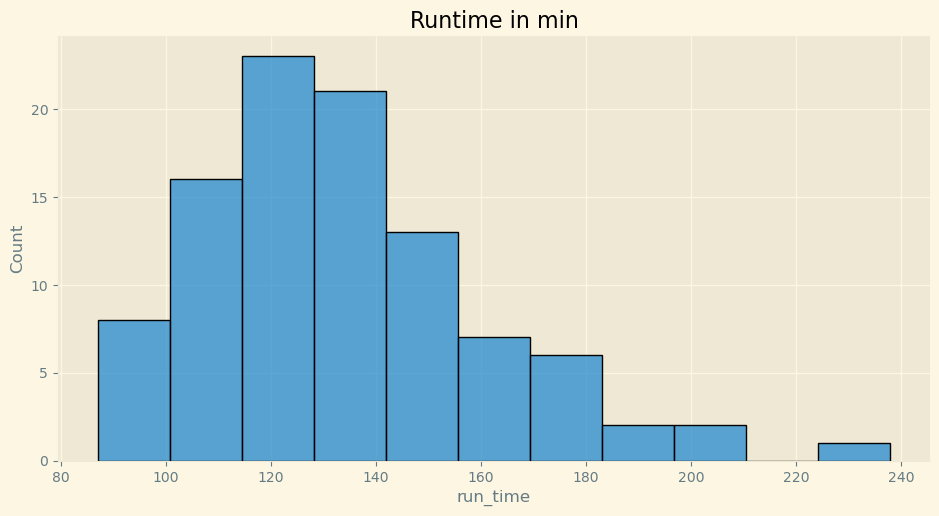

In [49]:
sns.displot(df, x= 'run_time', aspect=1.9)
plt.title("Runtime in min")
plt.show()

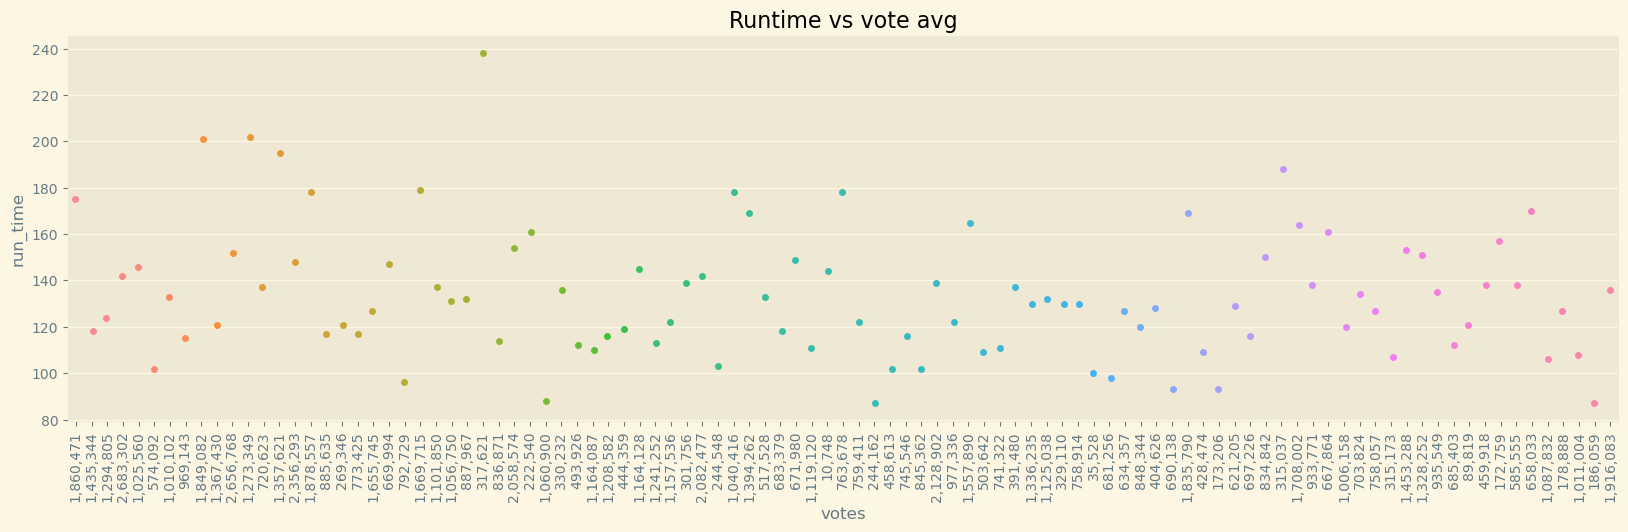

In [50]:
plt.figure(figsize = (20, 5))
sns.stripplot(x = df['votes'], y = df['run_time'])
plt.title("Runtime vs vote avg")
plt.xticks(rotation = 90)
plt.show()

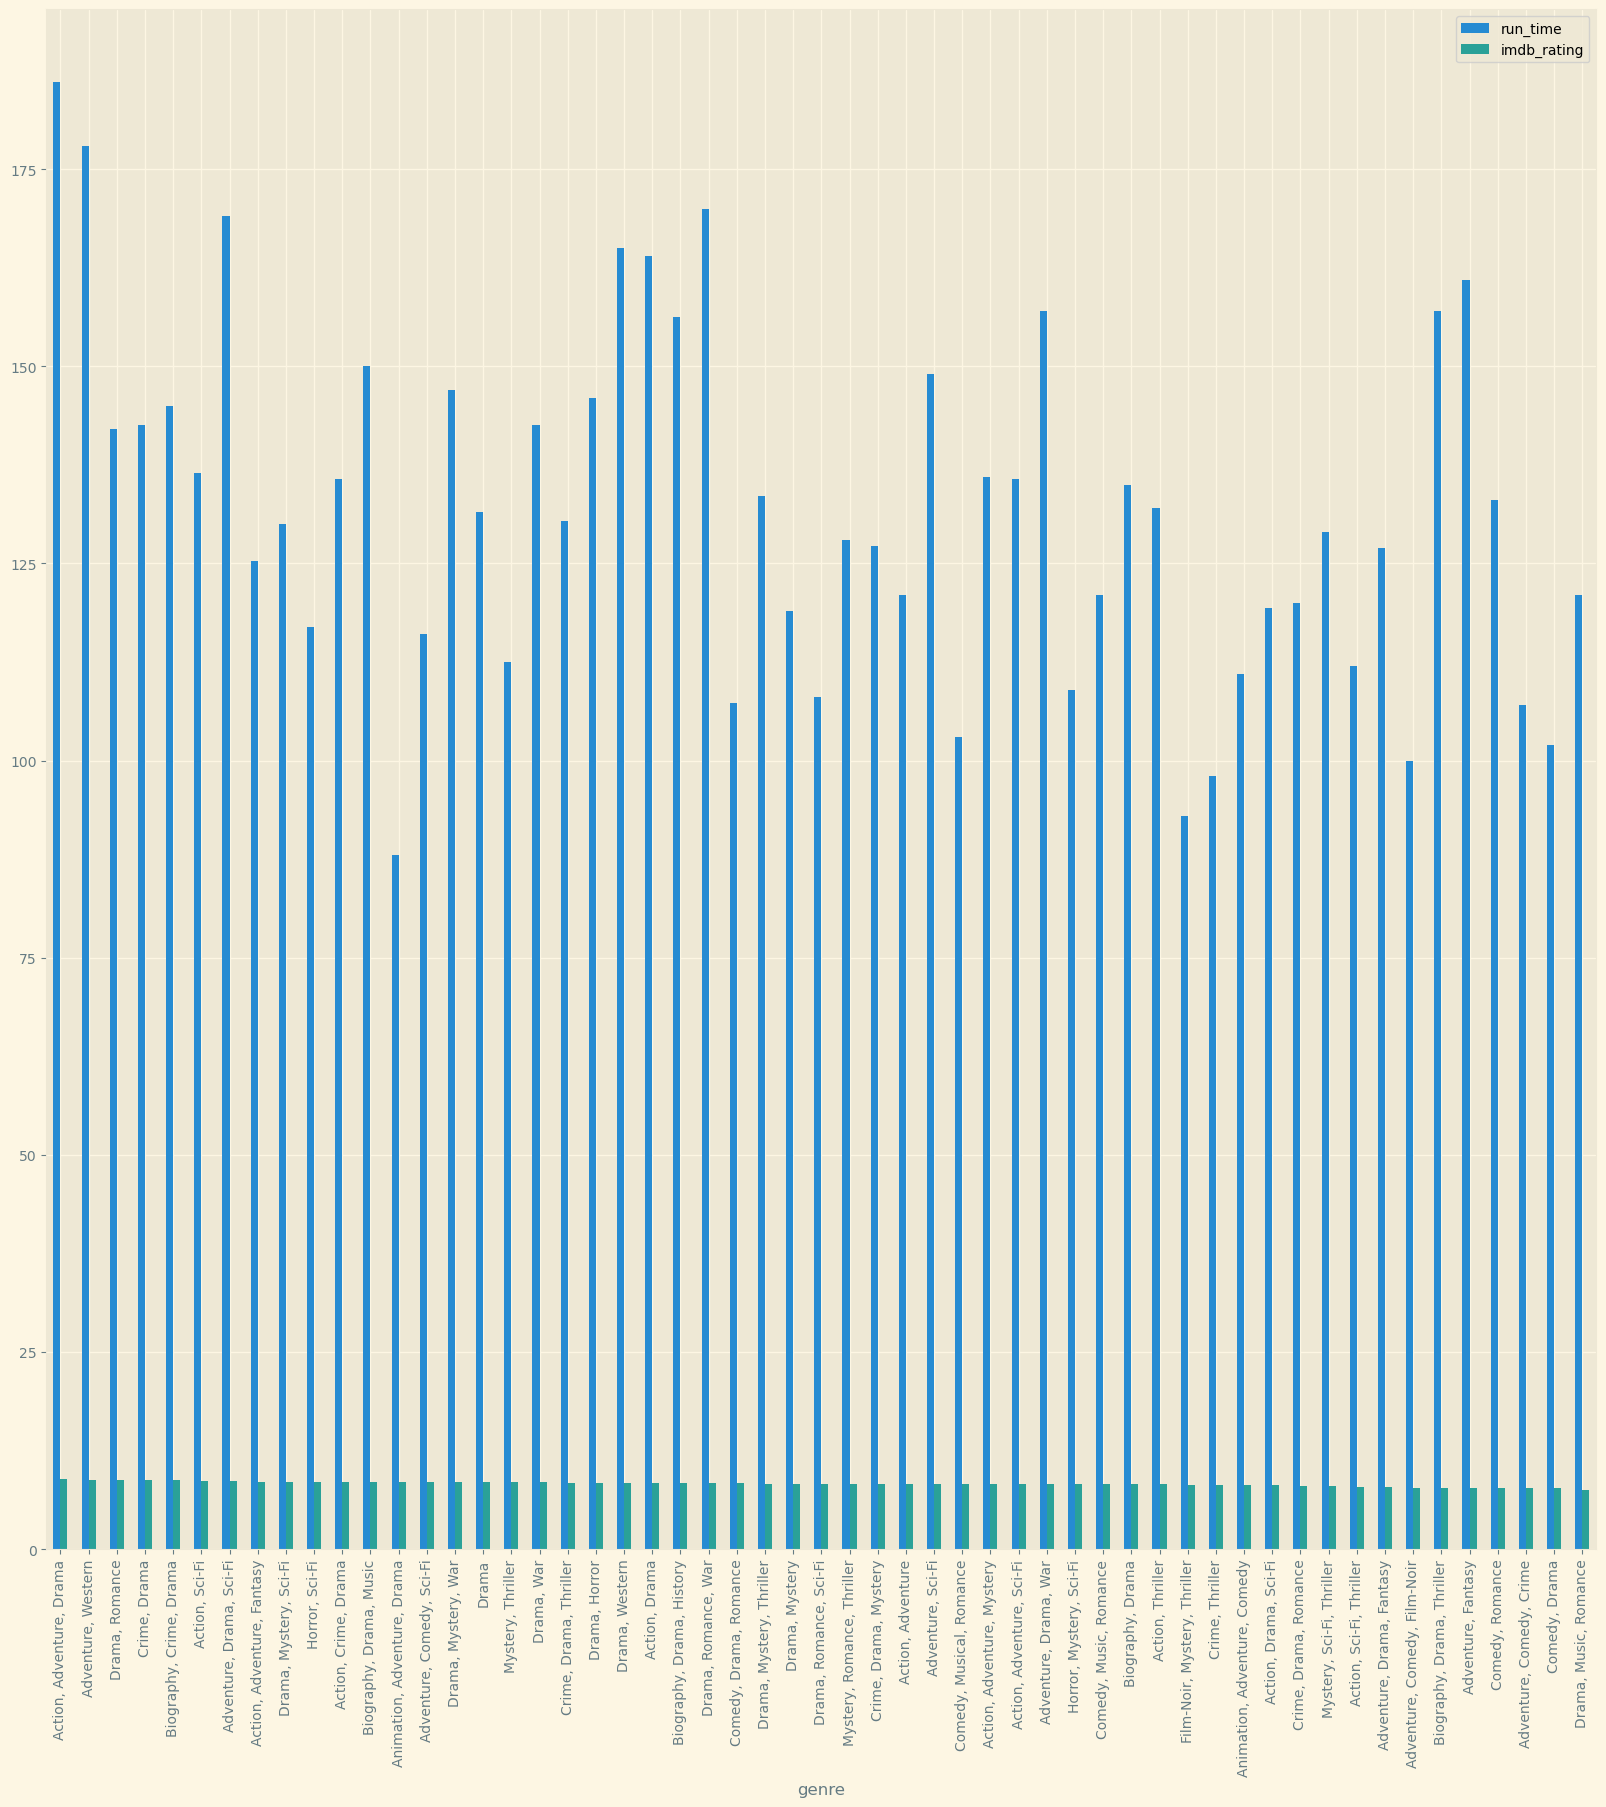

In [53]:
df.groupby('genre')['run_time', 'imdb_rating'].agg('mean').sort_values(by = 'imdb_rating', ascending = False).plot(kind = 'bar',
                                                                                                            figsize = (20, 20))
plt.show()

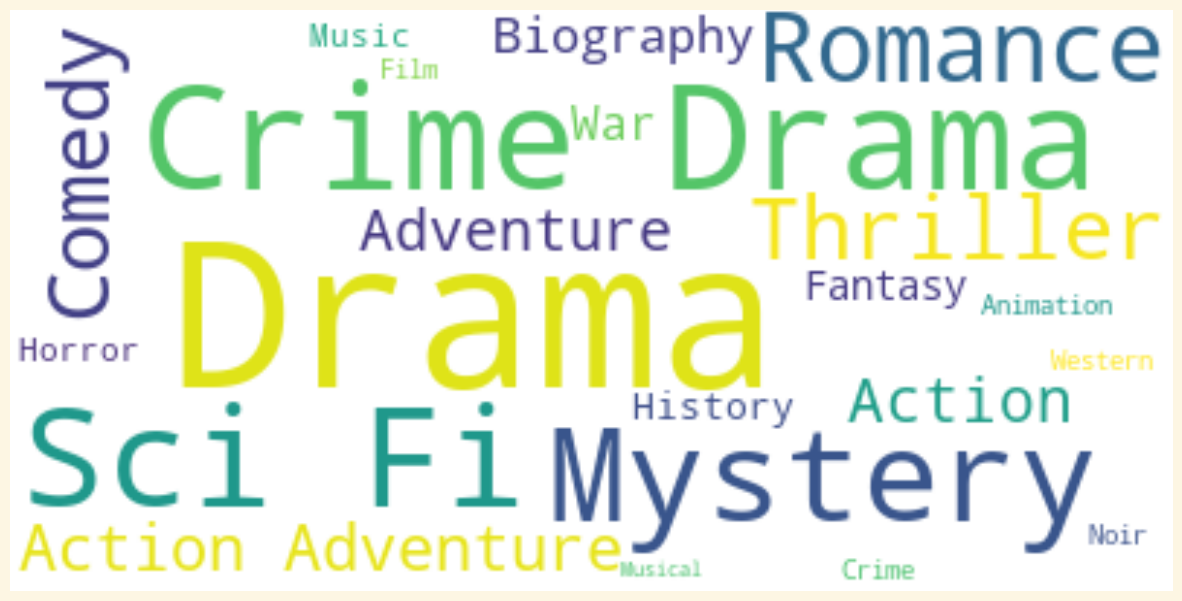

In [59]:
stopwords = set(STOPWORDS)
text = " ".join(df['genre'])

plt.figure( figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords, max_words=100, max_font_size=70, random_state=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();